<a href="https://colab.research.google.com/github/Roumyajit/My-Project-Data-Science/blob/main/Copy_of_Rainfall_Prediction_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset 1 (district wise rainfall normal):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATE_UT_NAME  641 non-null    object 
 1   DISTRICT       641 non-null    object 
 2   JAN            641 non-null    float64
 3   FEB            641 non-null    float64
 4   MAR            641 non-null    float64
 5   APR            641 non-null    float64
 6   MAY            641 non-null    float64
 7   JUN            641 non-null    float64
 8   JUL            641 non-null    float64
 9   AUG            641 non-null    float64
 10  SEP            641 non-null    float64
 11  OCT            641 non-null    float64
 12  NOV            641 non-null    float64
 13  DEC            641 non-null    float64
 14  ANNUAL         641 non-null    float64
 15  Jan-Feb        641 non-null    float64
 16  Mar-May        641 non-null    float64
 17  Jun-Sep    

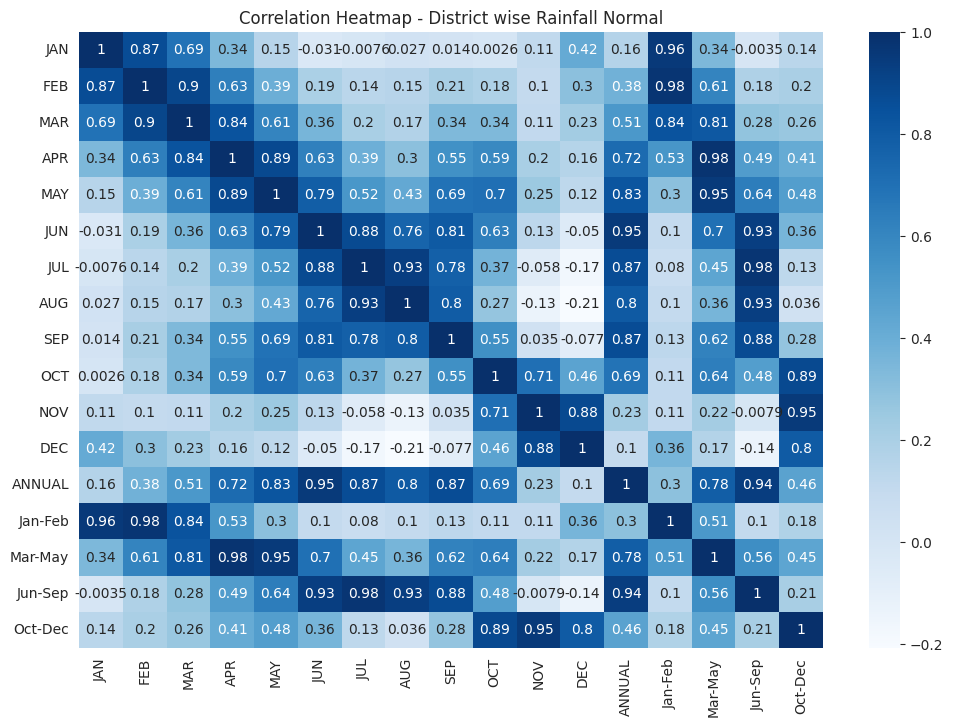

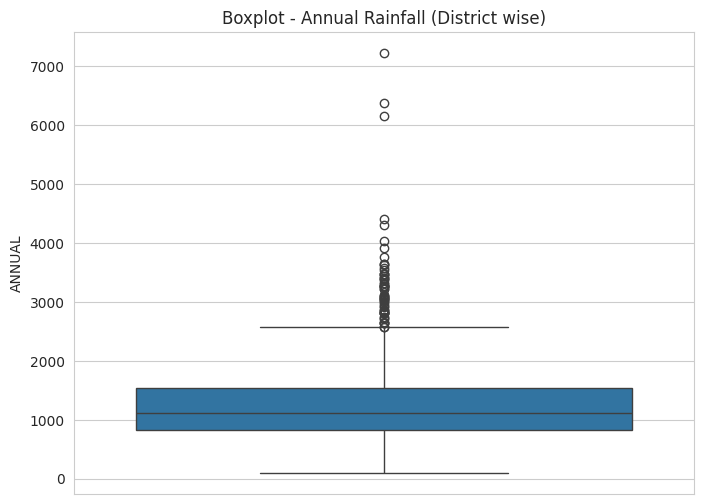

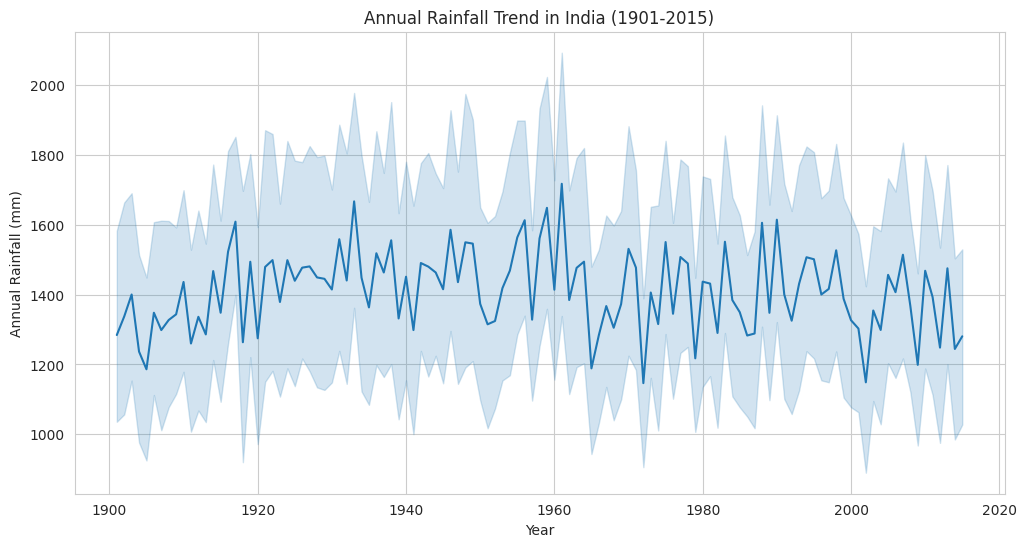

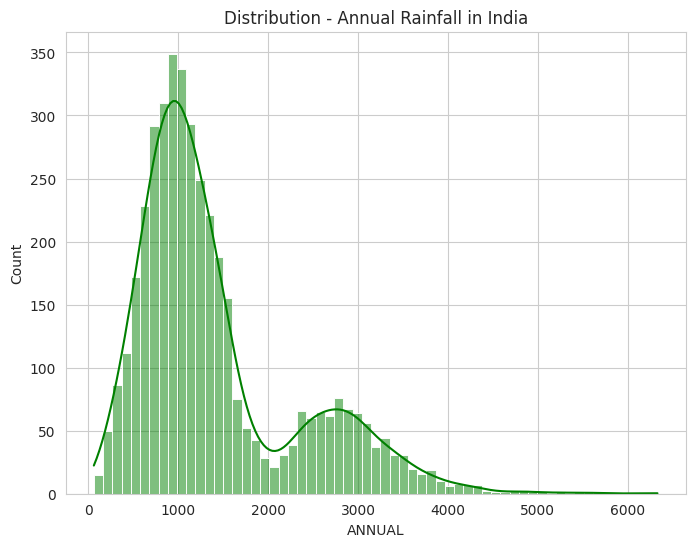


Model Performance:
Mean Squared Error: 2280.16
R2 Score: 1.00


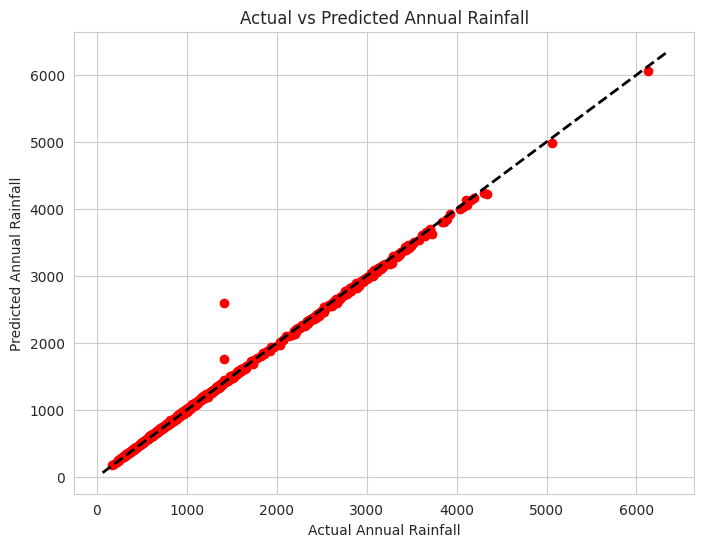


Predicted Annual Rainfall for sample data: 1082.59 mm


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Load Datasets
df1 = pd.read_csv('/content/district wise rainfall normal.csv')
df2 = pd.read_csv('/content/rainfall in india 1901-2015.csv')

# Check dataset info
print("Dataset 1 (district wise rainfall normal):")
print(df1.info())
print(df1.head())
print("\nDataset 2 (rainfall in india 1901-2015):")
print(df2.info())
print(df2.head())

# Check missing values
print("\nMissing values in Dataset 1:")
print(df1.isnull().sum())
print("\nMissing values in Dataset 2:")
print(df2.isnull().sum())

# Handle missing values
df1.fillna(df1.mean(numeric_only=True), inplace=True)
df2.fillna(df2.mean(numeric_only=True), inplace=True)

# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Correlation Heatmap - District wise Rainfall Normal')
plt.show()

# Boxplot for ANNUAL Rainfall
plt.figure(figsize=(8,6))
sns.boxplot(df1['ANNUAL'])
plt.title('Boxplot - Annual Rainfall (District wise)')
plt.show()

# Trend of Rainfall over years
plt.figure(figsize=(12,6))
sns.lineplot(x='YEAR', y='ANNUAL', data=df2)
plt.title('Annual Rainfall Trend in India (1901-2015)')
plt.xlabel('Year')
plt.ylabel('Annual Rainfall (mm)')
plt.show()

# Distribution Plot of Annual Rainfall
plt.figure(figsize=(8,6))
sns.histplot(df2['ANNUAL'], kde=True, color='green')
plt.title('Distribution - Annual Rainfall in India')
plt.show()

# Features and Target for Dataset 2
X = df2[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
y = df2['ANNUAL']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Plot actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='red')
plt.xlabel('Actual Annual Rainfall')
plt.ylabel('Predicted Annual Rainfall')
plt.title('Actual vs Predicted Annual Rainfall')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

# Predict new sample
sample = np.array([[10, 15, 20, 25, 30, 200, 300, 250, 150, 50, 20, 15]])
predicted_annual = model.predict(sample)
print(f"\nPredicted Annual Rainfall for sample data: {predicted_annual[0]:.2f} mm")